By the end of this experiment, Students Will Be Able To...

    ... pick an appropriate basis set for a given problem and justify the choice
    ... perform an energy minimization in Psi4, importing the molecule from pubchem
    ... perform a geometry optimization
    ... generate predicted frequencies of normal modes and see the irreducible representation for each mode
    ... use `fortecubeview` to visualize normal modes and electronic surfaces
    ... collect generated data into plots that assist in justifying conclusions
    ... use the vocabulary of computational chemistry appropriately

# Getting started

If you haven't watched the lecture video for this experiment, go do that now.

You might also find it useful to read the following article: Bell, Dines, Chowdhry, and Withnall, "Computational Chemistry Using Modern Electronic Structure Methods", J Chem Educ, 84 (8) 2007.

## A note about software and hardware choices

The time it takes computers to do the calculations involved in computational chemistry spans orders of magnitude. For simple calculations on small molecules, a reasonably new laptop can do them in a few seconds. For high precision calculations on hundreds (or thousands) of atoms, a super-computer might need weeks. This guides choices in how a scientist might choose to interact with their software.

We're doing simple calculations on small molecules. You could honestly set up this entire software stack to run locally. I'm not asking you to do it, because the installation is finicky. So I've set us up with ChemCompute, which has both a **lot** of compute capacity and exactly the software stack we're looking for. I'm also having you work in Jupyter notebooks, because I like how accessable they are for students.

(If you want to install things locally, Psi4 has directions on their website, but you'll want WSL if you run Windows. But basically if you're not in our about to join the Bennett lab, it's just working harder for no good reason. And if you are in the Bennett lab, it'd still just be something you do for funsies.)

But Psi4, the computational package we're working with, is research grade, and can span the range to really intense calculations. If you look through their website, or the resources MolSSI (https://education.molssi.org/resources.html) has for learning quantum chemistry, you'll see entirely different ways of interacting with the Psi4 package, that are more appropriate for research level uses.

# Part 1: Your first electronic structure calculations

To get started, let's import the libraries we'll need. I've given you a brief description of each in the comments. `psi4` is the key new library - that's the one that's doing all the work.

In [1]:
import psi4 #the quantum chemistry package
import matplotlib.pyplot as plt #plotting as always
import numpy as np #numpy for everything
import pandas as pd #Pandas will let us work with data more easily and make pretty tables
import fortecubeview #A viewer for normal modes and MO surfaces

## Defining a molecule

The first step in doing a calculation on a molecule is...to have a molecule. We'll be working with single molecules in a vacuum - there will be one copy of the molecule in our coordinate space, and that's it. This lets us calculate things that are relvant to an isolated molecule or a weakly interacting system.

To have a molecule, you need to have the identities of the atoms and an approximate geometry. One way to do it is to define the geometry explicitely. In the lines below, I use the function `geometry()` from Psi4 to say what atoms are where. The format of a row is:
`Atom symbol x-coord y-coord z-coord`

In [2]:
methane = psi4.geometry("""
C 0 0 0
H 1.04710913e+00  1.51101313e+00 9.38249021e-01
H 1.29126174e+00 -1.53711511e+00 -4.79234545e-01
H -1.47057299e+00 -7.05824588e-01  1.26460472e+00
H -8.67939329e-01  7.32068021e-01 -1.72361920e+00
""")

Now, you're saying, that's nice...but how do I come up with those numbers for a new molecule? There are a couple of ways.

You can estimate the bond lengths and angles from your knowledge of chemistry, maybe with a gen chem book. Then you can perform the trigonemetry needed to project that information into cartesian space.

You can learn what a z-matrix is. Basically, that lets you work directly from bond lengths and angles, defining all atoms relative to each other, so you don't have to convert to cartesian coordinates. You'll see one further down in this tutorial.

The easiest way with common molecules is to grab them off of PubChem.

In the cell below, I've grabbed the PubChem geometry for methane. Note that it's set up just like the cartesian input example above, but instead of specifying any geometry, it just asks PubChem to get the molecule with that name.

In [4]:
methane = psi4.geometry("""
        pubchem:methane
        """)

	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)


Now, I want to see *what* this object is, so I'm going to type it's name into the cell below. Execute the cell to see how that information is stored.

In [5]:
methane

## Calculating an energy

Alright let's do this! We're going to use Hartree-Fock self-consistent field theory on a minimal basis set to calculate the minimized single point energy of methane. Are you ready? Sounds scary.

In [6]:
psi4.energy('scf/STO-3g', molecule = methane)

-39.726728729637216

So let's look at what we put inito that command. The function is `energy()` within the `psi4` package. You can call `help(psi4.energy)` to see more information on how to call that. We've fed it three pieces of information:

`scf` sets the type of calculation we're doing, in this case Hartree-Fock self-consistent field theory. Information about the options Psi4 supports is found here: https://psicode.org/psi4manual/master/autodoc_options_c_bymodule.html#apdx-options-c-module There are a **lot** of options. Right now, don't worry overmuch about what to pick - you can use `scf` for everything we need. If you're feeling fancy, you might read up on coupled-cluster or Moller-Plesset perturbation theory and use one of those.

**The thing to remember when picking a type of theory is that each has to balance computational complexity with wanting to capture more possible chemical or physical processes**. It's not "this one is better and that one is worse" it's "this one is slow but handles excited state dynamics really well, but that one is quick but looses accuracy when exploring reaction coordinates".

## Optimizing the geometry

Now, depending on how you set your initial geometry, you might need to move atoms around. Remember that most quantum chemistry works on the Born-Oppenheimer approximation (https://en.wikipedia.org/wiki/Born%E2%80%93Oppenheimer_approximation), that is, you can assume nuclear motion is very slow relative to motion of electrons. We usually treat "move the electrons around" as a separate step from "move the nuclei around".

If you generated your input file by hand, or if you do something like substitute a chlorine for a hydrogen, your geometry will need to be relaxed before you can be confident that you have the minimum energy. So let's go ahead and optimize the geometry of our methane molecule. In the lines below, I do several things: access the geometry of the molecule, optimize the geometry, calculate a couple of energies, and print a bunch of things out.

#### The wrong way to read the cell below

"Cool, I see, bunch of numbers, some of them changed. Moving on."

#### How you should read the cell below

It should take you a couple minutes. Figure out what each line of code is doing. Match it to what you see printed below. This is a good example of where you might talk this out with a classmate. It's easy to read this code and not take in how it works.

In [7]:
print("Initial geometry is\n", np.array(methane.geometry()))
print("Initial energy is ", psi4.energy('scf/STO-3g', molecule = methane))
psi4.optimize('scf/STO-3g', molecule = methane)
print("Final geometry is\n", np.array(methane.geometry()))
print("Final energy is ", psi4.energy('scf/STO-3g', molecule = methane))

Initial geometry is
 [[ 1.18799678e-05 -1.18799678e-05 -7.87477397e-18]
 [ 1.04710913e+00  1.51101313e+00  9.38249021e-01]
 [ 1.29126174e+00 -1.53711511e+00 -4.79234545e-01]
 [-1.47057299e+00 -7.05824588e-01  1.26460472e+00]
 [-8.67939329e-01  7.32068021e-01 -1.72361920e+00]]
Initial energy is  -39.726728729634814
Optimizer: Optimization complete!
Final geometry is
 [[-1.59357567e-07  1.87259641e-07  2.27867309e-08]
 [ 1.03843138e+00  1.49835239e+00  9.30412250e-01]
 [ 1.28052599e+00 -1.52429468e+00 -4.75223123e-01]
 [-1.45827754e+00 -6.99961355e-01  1.25401429e+00]
 [-8.60677933e-01  7.25901409e-01 -1.70920369e+00]]
Final energy is  -39.72701070032367


# Choosing a basis set

Alright now let's explore some basis sets, to see what that does. I'm going to perform the same calculation using a series of basis sets, grabbing the energy and storing it in an array each time. Then I'm going to plot the result.

Refer to the journal article from the top of the tutorial for more information about basis sets. You can see the ones Psi4 supports here: https://psicode.org/psi4manual/master/basissets_tables.html#apdx-basistables

STO-3G
Energy is  -39.7270107003247
Number of basis sets is  9
3-21G
Energy is  -39.976879717132036
Number of basis sets is  17
6-31G
Energy is  -40.18054840730945
Number of basis sets is  17
cc-pvdz
Energy is  -40.19855286022685
Number of basis sets is  34
6-311g(d)
Energy is  -40.202638586992094
Number of basis sets is  30
6-311++G(d,p)
Energy is  -40.209144868489346
Number of basis sets is  50


Text(0, 0.5, 'Minimized energy')

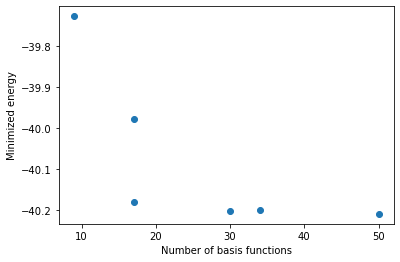

In [8]:
energies = np.array([])
basis_set_sizes = np.array([])
#A note: are you looking at the length of my variable names and being sad at
# how long they are? Ask me to demonstrate tab-completion for you.

basis_sets = ["STO-3G", "3-21G", "6-31G", "cc-pvdz", "6-311g(d)", "6-311++G(d,p)"]

#Another note: None of these calculationis take long when using HF-SCF on methane,
# mostly because methane is a REALLY small molecule - only 2 p electrons.
# If you end up working at a higher level of theory on a molecule with a lot
# more electrons (how many in chlorine?), these calculations might end up taking a while.
# It's useful to remember how to do a keyboard interrupt
# and be ready to regroup and try again.

for basis_set in basis_sets: 
    print(basis_set)
    psi4.set_options({'basis': basis_set})
    result, wfn = psi4.energy('scf', return_wfn = True)
    nbf = wfn.basisset().nbf()
    energies = np.append(energies, result)
    basis_set_sizes = np.append(basis_set_sizes, nbf)
    print("Energy is ", result)
    print("Number of basis sets is ", nbf)
    
plt.plot(basis_set_sizes, energies, 'o')
plt.xlabel("Number of basis functions")
plt.ylabel("Minimized energy")

What I see in that plot is that increasing the basis set complexity has a significant change initially, but there's very little gain after a while.

Feel free to throw in a few more basis sets, or take away ones that I've tried. I was not scientific in my choice for the example - I just picked a sampling of different types.

# Looking at the geometry over basis sets

Now let's see how changing the basis set changes the geometry. Firstly, remember that we can think about geometries in two different ways: cartesian coordinates, and bond lengths and angles and whatnot. You and I usualy like the second way. But the computer is more comfortable with coordinates. So we'll have to remember to do math to access a bond length or a bond angle. The math is geometry: the pythorgean theorm or sins and cosines, that sort of thing.

In the cell below, I'm going to check the C-H bond length (can you see which characters specify those atoms?) as calculated by an optimized geometry across a few basis sets, and I'm going to plot the result. To help me troubleshoot, I put in lots of printed text outputs, so that I could see what lines had executed and what the results were.

	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)
STO-3G
Optimizer: Optimization complete!
C-H bond length is  1.0830776075593063  Angstroms
Number of basis sets is  9
	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)
3-21G
Optimizer: Optimization complete!
C-H bond length is  1.082920797256209  Angstroms
Number of basis sets is  17
	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)
6-31G
Optimizer: Optimization complete!
C-H bond length is  1.0821244809195156  Angstroms
Number of basis sets is  17
	Searching PubChem database for methane (single best match returned)
	Found 1 result(s)
6-311g(d)
Optimizer: Optimization complete!
C-H bond length is  1.0830188802543403  Angstroms
Number of basis sets is  30


Text(0, 0.5, 'C-H bond length')

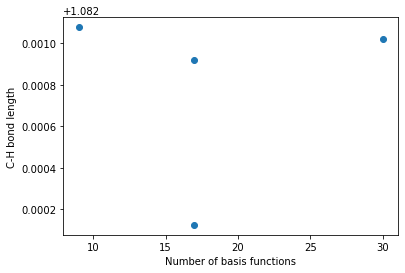

In [9]:
basis_set_sizes = np.array([])
bond_lengths = np.array([])
basis_sets = ["STO-3G", "3-21G", "6-31G", "6-311g(d)"]


for basis_set in basis_sets: 
    methane = psi4.geometry("""
        pubchem:methane
        """)
    print(basis_set)
    psi4.set_options({'basis': basis_set})
    result, wfn = psi4.optimize('scf', return_wfn = True)
    
    current_geometry = np.array(methane.geometry()) #grab the geometry and store it
    bond_length = np.linalg.norm(current_geometry[1,:]-current_geometry[0,:])*0.529177 #calculate the distance then convert from Bohr to Angstroms
    bond_lengths = np.append(bond_lengths, bond_length)
    print("C-H bond length is ", bond_length, " Angstroms")
    
    nbf = wfn.basisset().nbf()
    basis_set_sizes = np.append(basis_set_sizes, nbf)
    print("Number of basis sets is ", nbf)
    
plt.plot(basis_set_sizes, bond_lengths, 'o')
plt.xlabel("Number of basis functions")
plt.ylabel("C-H bond length")

Two notes about what I did there.

1. I reloaded the geometry of methane for each iteration. When you perform a geometry optimization, Psi4 saves the new geometry in the instance of that molecule, and uses it for future calculations. That means, if I didn't reload the file, then the output geometry from STO-3G would be used as the input geometry for 3-21G, in the above example. I want to see the geometry optimization performed on each basis set independently, so I grabbed a fresh copy of the initial geometry. If I was feeling really fancy, I'd start from a stretched C-H bond length.

2. Unlike energy, we don't a priori expect a pattern for bond lengths or angles as we increase the size of the basis set. I would expect that, for a give type of basis set, increasing the number should show a trend, but there is no variational principle at work here, so it can go the other way.

2b. On the other hand, notice how small the changes are - we're starting from an optimized geometry. It's all small changes. (Consider the percentage here.)

# Part 2: Calculating normal modes

Finally, let's look at how to use Psi4 to generate normal mode frequencies, and then visualize them. You'll likely want to reference chem 302 or chem 405 notes here: I'm not going to teach you normal mode analysis here, just how to calculate them.


## Calculating frequencies

I'm going to switch molecules now and work with carbon dioxide. In the cells below, I'm going to define my molecule, check the point group, optimize the geometry, and check the point group again. (You should ask yourself why I'm checking the point group so often throughout this analysis.)

### What's up with that geometry definition
I'm defining the molecule using the third method I described above: a z-matrix. Here's a brief description of a z-matrix:
 - Each line is one atom
 - Atom `1` is just identified with it's symbol
 - Atom `2` gets it's symbol, and a bond length specified relative to atom `1`
 - Atom `3` gets symbol, bond length relative to `1`, angle relative to atom `2`
 - All further atoms get symbol, bond length, bond angle, and a dihedral angle
 - At this point we're just living in a new three coordinate system, where the coordinates are (bond length, bond angle, dihedral angle) all relative to previously defined atoms
 - Each row references previously defined atoms by number, 1-indexed

You should read my definition of carbon dioxide below and verify that you understand how that string of letters and numbers is the geometry of CO2. It's really a lovely system once you learn it, but it takes a beat to learn.


In [10]:
co2 = psi4.geometry("""
C
O 1 1.0 
O 1 1.0 2 180
""")

In [11]:
print("The inital point group of this molecule is ", co2.get_full_point_group())
psi4.optimize('scf/6-31g', molecule = co2)
print("The point group after geometry optimization is ", co2.get_full_point_group())

The inital point group of this molecule is  D_inf_h
Optimizer: Optimization complete!
The point group after geometry optimization is  D_inf_h


Next, I'm going to use the Psi4 function `frequencies()` to calculate normal modes. The key-word argument `return_wfn = True` is an option argument to explicitely calculate the wave functions. You'll notice that I'm storing two outputs: the minimized energy and the wavefunctions.

In [12]:
energy, wfn = psi4.frequencies('scf/6-31g', molecule = co2, return_wfn = True)
co2.get_full_point_group()


'D_inf_h'

The final bit of Psi4 code to do is ask it to perform a freqency analysis. This command tells it to calculate all the useful bits for understanding the normal modes calculated, and lets me put it all together into one large object that I'm calling `vibinfo`.

In [13]:
vibinfo = wfn.frequency_analysis

Alright I've done a bunch of math. And there are no outputs. I'd like to actually look at some data now. I'm going to grab out the parts of `vibinfo` that I want to view and store them in each as a list.

In [14]:
reps = vibinfo['gamma'].data
freqs = np.real(vibinfo['omega'].data)
motion = vibinfo['TRV'].data
deg = vibinfo['degeneracy'].data
# This is not the only way to corral your data!
# It's also probably not the simplest way!
# It's just the way that made sense to me when I learned Psi4 in December.

Finally, I'm going to smoosh all that together into something called a Pandas dataframe. The entire point of doing this is just that it gets me an attractive looking output table. Pandas can do many wonderful this, but we're just using this ony tiny feature today.

 - `pd` is my alias for the Pandas library
 - `DataFrame()` is the Pandas command for creating a dataframe. Dataframes are like Numpy arrays but more robust to disorganized data, and they allow you to have human-friendly features like column titles.
 - `transpose([...])` is me putting together all four of my lists, then flipping rows with columns, because that's how I want it displayed
 - `columns = [...]` is where I can put in the headers for the columns

In [15]:
pd.DataFrame(np.transpose([reps, freqs, motion, deg]), columns = ["Representation", "Frequency (wavenumbers)", "Type of motion", "Degeneracy"])

,Representation,Frequency (wavenumbers),Type of motion,Degeneracy
0,None,0.0,TR,5
1,None,0.000012,TR,5
2,None,0.000017,TR,5
3,None,0.00002,TR,5
4,None,0.000028,TR,5
5,None,656.408619,V,2
6,None,656.40862,V,2
7,Ag,1407.474755,V,1
8,B1u,2374.709613,V,1


### What's that table telling me?

Step back and think through how many motions there are in carbon dioxide. How many translations should you get? How many rotations? And how many vibrations does that leave?

Next, notice that five of the modes have a frequency of basically zero, and are given the header "TR". The other four are given the type of motion "V".

Finally, can you square the representations you see for the vibrations? What types of motion might be happening for each of those?

## Looking at normal modes

Alright you've got frequencies, you've got types of motions, but lets draw some pictures. We chemists do love a good drawing. To do this, we're first going to need to store some files.

### Generating cube files



**A note** I'm redoing the analysis here. I'm literally repeating the initialization of the molecule, then recalculating normal modes. It's totally repetative, because I wanted to show you the simple version first and then add in the visualization. But *you* don't need to repeat the code. In fact you shouldn't. In your write-up, you should turn in just the portions of the code that are unique.

In [16]:
co2 = psi4.geometry("""
C
O 1 1.0 
O 1 1.0 2 180
""")

print("The inital point group of this molecule is ", co2.get_full_point_group())
psi4.optimize('scf/6-31g', molecule = co2)
print("The point group after geometry optimization is ", co2.get_full_point_group())

#set it to write the normal modes information to a data file and set the filename
psi4.set_options({"normal_modes_write": True})
psi4.set_options({"writer_file_label":"co2"})

#calculate the normal modes
e, wfn = psi4.frequencies('scf/6-31g', molecule = co2, return_wfn = True)
vibinfo = wfn.frequency_analysis

print("The point group after frequency calculations is ", co2.get_full_point_group())

# filename is the writer_file_label above, then a number
# (totally meaningless bonus points to the student who figures out what the number is)
# then molden_normal_modes.
# This filename is automatically stitched together by the software.
# You can see your file in the folder you're working in.


fortecubeview.vib('co2.30.molden_normal_modes')

The inital point group of this molecule is  D_inf_h
Optimizer: Optimization complete!
The point group after geometry optimization is  D_inf_h
The point group after frequency calculations is  D_inf_h


HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Select:', options=('1: Normal mode (656.4 cm^-1)', '2: Normal mode (…

### Interacting with the widget

It takes a beat to load, so be patient.

You should see a list of visualizations to choose from at the bottom.

Your molecule pops up in the center. You can rotate the molecule by clicking and dragging. Two-finger scroll on a touchpad zooms. I have no idea how well those directions translate to other computers; I'm on a Windows touchscreen lappy running Firefox. But you should be able to find a way to rotate and zoom.

### So what?

The widget you're getting shows the geometry of your molecule. You should scroll through the modes you're looking at and consider what you're seeing. Can you square it with the representations above? Can you compare these normal modes with what you see in an experimental spectrum from a database?

## Looking at orbitals and the density

There are lots of options for output files. You can also generate the electron density and surfaces for molecular orbitals. One standard format for this is called a cube file, which takes a mathematical function like the shape of an orbital, evaluates it at every point in a cube, and writes that result to a text file.

In the cell below, I'm going to ask Psi4 to write some orbitals and the electron density to cube files. The default is to write ALL the orbitals, but that's really slow and I'm impatient. Orbitals are numbered from lowest to highest energy. I'm most interested in the HOMO, LUMO, HOMO-1, and LUMO+1. Let's briefly work out which orbital numbers those are:

C: 1s<sup>2</sup>2s<sup>2</sup>2p<sup>2</sup> = 6 electrons

O: 1s<sup>2</sup>2s<sup>2</sup>2p<sup>4</sup> = 8 electrons x 2 = 16 electrons

22 electrons

That means we'll have 22 orbitals, and the HOMO is halfway up, so

HOMO = 11, LUMO = 12


In [19]:
psi4.set_options({
    'CUBEPROP_TASKS': ['ORBITALS', 'DENSITY'],
    'CUBEPROP_ORBITALS': [10, 11, 12, 13],
    'CUBEPROP_FILEPATH': 'thingy' #you should pick a better path than this
})
psi4.cubeprop(wfn)
fortecubeview.plot(path = 'thingy', width=500,height=300,colorscheme='emory',sumlevel=0.75)

CubeViewer: listing cube files from the directory thingy
Reading 8 cube files


HTML(value='\n        <style>\n           .jupyter-widgets-output-area .output_scroll {\n                heigh…

interactive(children=(Select(description='Cube files:', options=('Density (alpha)', 'Density (beta)', 'Density…

In [20]:
help(fortecubeview.plot)

Help on function plot in module fortecubeview.fortecubeview:

plot(path='.', cubes=None, width=400, height=400, colorscheme='emory', levels=None, colors=None, opacity=1.0, sumlevel=0.85, show_text=True, font_size=16, font_family='Helvetica')
    A simple widget for viewing cube files. Cube files are authomatically loaded from the current
    directory. Alternatively, the user can pass a path or a dictionary containing CubeFile objects
    
    Parameters
    ----------
    path : str
        The path used to load cube files (default = '.')
    cubes : list
        List of cube files to be plotted
    width : int
        the width of the plot in pixels (default = 400)
    height : int
        the height of the plot in pixels (default = 400)
    colorscheme : str
        the colors scheme used to represent the orbitals/densities.
        Options include emory (default), national, bright, electron, wow
    levels : list(float)
        a list of levels to plot (default = None).
        Ove

# Some considerations and problems that might come up

## Your symmetry is wrong

### A digression about symmetry

For some calculations, the point group of the molecule doesn't matter. The energy is the energy, no big deal. But, in order to calculate normal modes and properly assign them in a spectrum, we need to have a molecule that's in the right point group. We run into a funny problem here: rounding errors and sig figs. Think about the shape of methane in your head right now: it's a carbon in the middle, two hydrogens pointing out this way, two hydrogens pointing out the other side. In your head, you've defined it with exact angles. The computer projects this into cartesian coordinates. In the limit of infinite decimal places, these two representations are exactly the same thing: you project the angles into cartesian space and it's fine. But, once you round off, you can introduce a smidge of error. Similarly, if the computer is following an algorithm to relax a geometry to a minimum, it might relax this hydrogen a smidge this way and the next one a smidge another way. You and I both know that 1.082323 and 1.082324 are the same for all intents and purposes. But *technically* they're not the same bond length. If your molecule has those two bond lengths, then those bonds aren't symmetric. There are methods to tell Psi4 to chill with the decimal places, but I've had difficiulty always getting it to return the correct symmetry.

## Your cube files are the wrong molecule

The cubeviewer loads every cube file withing the folder in question. When you switch to a new molecule, you'll probably want to create a new folder. You have to create the folder first, and then change your `'CUBEPROP_FILEPATH'` variable to match.

# What you're turning in

Basically, you're goal is to show me that you can do each of the SWBAT's from the very top of this file. Here's specific directions:

1. Create a new Juypter notebook. The filename should *begin* with your full name. You should use Markdown cells and comments throughout so that I can read what you're doing.

2. You'll be working with chloromethane for the first part of the assignment. Make a series of plots showing some or all of the following: 
 - minimization energy for a range of basis set sizes
 - calculation time for a range of basis set sizes
 - bond length or angles for a range of basis set sizes

3. In a paragraph, pick the basis set that you think is most appropriate for this molecule, and justify your choice based on the data you've presented.

4. Next, switch to water. Calulate the normal modes for water. Display a nice table. In a brief paragraph, summarize the content of your table, comparing it with what normal modes you'd expect to see.

5. Use `fortecubeview` to display the normal modes for water. In a brief paragraph, discuss one or more visualizations and compare with what you showed on the table and what you expect to see. 

Thing | Points
-|-
Your submission is a new \*.ipynb file | 2
Your filename is your full name | 2
All your code executes (see note below) | 4
You used Markdown cells to explain your work | 2
You used headers in Markdown to make it easy to follow | 2
You commented along the way to make your code readible | 4
Your variable names are logical | 2
You don't have extraneous code | 2
-|-
You successfully calculate the energy of methane over a series of basis sets and collect those energies into an array or other object |10
You successfully calculate the calculation time, bond length, bond angle, or other relevant property over a series of basis sets and collect that information in an array or other object  |10
You have one or more graphs. These graphs have labels on their axes, and a title to help the reader follow what they show. Colors, symbols, and other graph features are chosen for easy visualization. It's not necessary to follow the ACS style guide here - pick what makes things the most clear | 10
You justify your choice of basis set in a paragraph|5
Your text references graphs to justify your choice|5
-|-
You successfully define a geometry of water that gives you the right point group | 6
You calculate the frequencies of the normal modes of water and display them in a neat table | 7
Your frequencies make sense | 5
You discuss those frequencies in a paragraph that explains the significance of the important numbers | 5
Your code generates cubeviewer for the normal modes of water | 7
Your normal modes are the right set of motions | 5
You discuss the observed motion in the context of the expected normal modes of water, referencing the visualization and table of frequencies as appropriate | 5


### FYI

To test if your code executes, follow these steps:
1. Open up your submission file
2. Go to the Kernel menu
3. Hit "Restart & Run All"
4. Hit Yes in the pop up
5. After it's finished executing, scroll through your file to be sure it all executed